In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
%matplotlib inline

In [3]:
chicago_crime =pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines =False)

In [4]:
chicago_crime.shape

(1456714, 23)

In [5]:
chicago_crime.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"


In [6]:
chicago_crime.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [7]:
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [8]:
chicago_crime.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


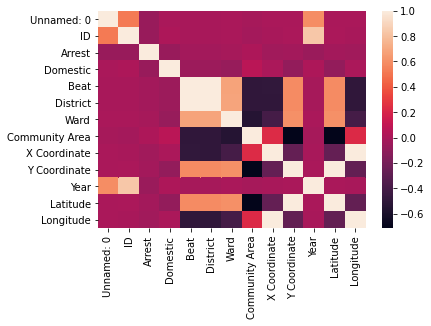

In [9]:
sns.heatmap(chicago_crime.corr())

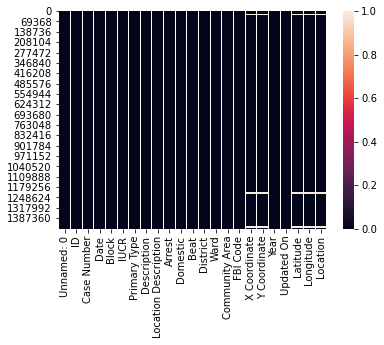

In [10]:
sns.heatmap(chicago_crime.isnull())

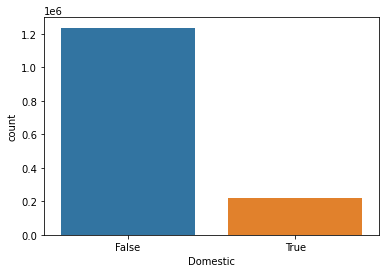

In [11]:
sns.countplot(x='Domestic', data=chicago_crime)

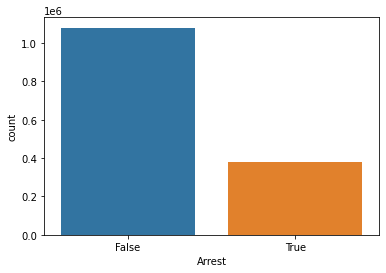

In [12]:
sns.countplot(x='Arrest', data=chicago_crime)

In [13]:
chicago_crime['Location Description'].nunique(dropna=True)

142

In [14]:
df=chicago_crime.drop(['Unnamed: 0','ID','FBI Code','IUCR','X Coordinate','Y Coordinate','Updated On','Case Number','District','Latitude','Longitude','Beat',
                      'Community Area','Ward','Year','Location'],axis=1)

In [15]:
df.tail(10)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1456704,05/03/2016 11:30:00 PM,053XX S PULASKI RD,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False
1456705,05/03/2016 11:50:00 PM,036XX E 106TH ST,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,False
1456706,05/03/2016 10:25:00 PM,071XX S MOZART ST,BATTERY,SIMPLE,SIDEWALK,True,False
1456707,05/03/2016 11:00:00 PM,085XX S MAY ST,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False
1456708,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True
1456713,05/03/2016 11:38:00 PM,001XX E 75TH ST,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False


## conversion of the date into a datetime format

In [16]:
df.Date =pd.to_datetime(df.Date, format ='%m/%d/%Y %I:%M:%S %p')

In [17]:
df.index =pd.DatetimeIndex(df.Date)

In [18]:
df['Date'].unique()

array(['2016-05-03T23:40:00.000000000', '2016-05-03T21:40:00.000000000',
       '2016-05-03T23:31:00.000000000', ...,
       '2016-05-03T23:28:00.000000000', '2016-05-03T23:33:00.000000000',
       '2016-05-03T21:07:00.000000000'], dtype='datetime64[ns]')

In [19]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2016-05-03 23:40:00,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 21:40:00,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2016-05-03 23:31:00,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
2016-05-03 22:10:00,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
2016-05-03 22:00:00,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True


In [20]:
df.tail()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
2016-05-03 21:07:00,2016-05-03 21:07:00,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True
2016-05-03 23:38:00,2016-05-03 23:38:00,001XX E 75TH ST,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False


In [21]:
df['Primary Type'].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [22]:
df['Description'].value_counts()

SIMPLE                        150600
$500 AND UNDER                136036
DOMESTIC BATTERY SIMPLE       130700
TO VEHICLE                     75801
OVER $500                      74906
                               ...  
FORNICATION                        1
EMPLOY MINOR                       1
CONTRABAND IN PRISON               1
ATTEMPT AGG: OTHER FIREARM         1
REFUSING TO AID AN OFFICER         1
Name: Description, Length: 342, dtype: int64

## finding the top 10 crimes that was comitted

In [23]:
df['Primary Type'].value_counts().iloc[:10]

THEFT                  329460
BATTERY                263700
CRIMINAL DAMAGE        155455
NARCOTICS              135240
ASSAULT                 91289
OTHER OFFENSE           87874
BURGLARY                83397
DECEPTIVE PRACTICE      75495
MOTOR VEHICLE THEFT     61138
ROBBERY                 57313
Name: Primary Type, dtype: int64

In [24]:
order_num =df['Primary Type'].value_counts().iloc[:10].index

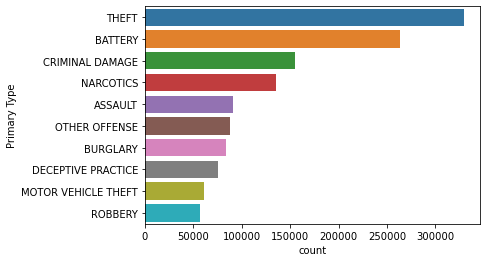

In [25]:
sns.countplot(y='Primary Type', data=df, order=order_num)

## finding how many of the crimes are street base,(location)

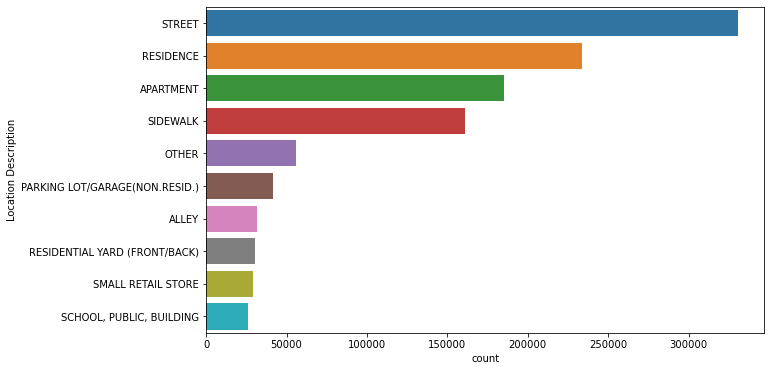

In [26]:
order_num2 =df['Location Description'].value_counts().iloc[:10].index
plt.figure(figsize=(10,6))
sns.countplot(y='Location Description', data=df, order =order_num2)

## finding the number of specific crime that occured in a specific month

In [27]:
df.resample('Y').size()

Date
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes in a year')

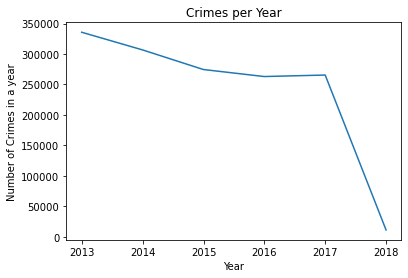

In [28]:
plt.plot(df.resample('Y').size())
plt.title('Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes in a year')

In [29]:
df.resample('M').size()

Date
2012-01-31    26194
2012-02-29    23847
2012-03-31    28533
2012-04-30    27164
2012-05-31    30067
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 61, dtype: int64

Text(0, 0.5, 'Number of Crimes in a month')

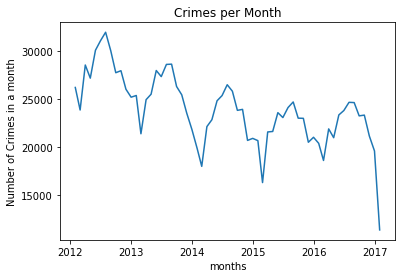

In [30]:
plt.plot(df.resample('M').size())
plt.title('Crimes per Month')
plt.xlabel('months')
plt.ylabel('Number of Crimes in a month')

Text(0, 0.5, 'Number of Crimes in a day')

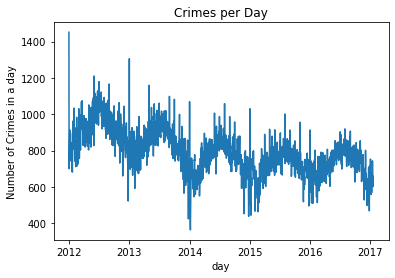

In [31]:
plt.plot(df.resample('d').size())
plt.title('Crimes per Day')
plt.xlabel('day')
plt.ylabel('Number of Crimes in a day')

Text(0, 0.5, 'Number of Crimes in a Quater')

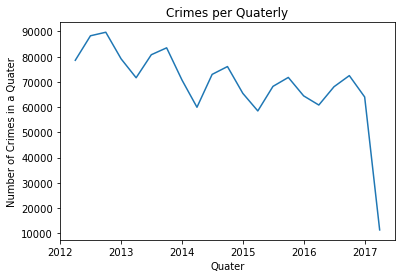

In [32]:
plt.plot(df.resample('Q').size())
plt.title('Crimes per Quaterly')
plt.xlabel('Quater')
plt.ylabel('Number of Crimes in a Quater')

In [33]:
df_1 =df.resample('M').size().reset_index()

In [34]:
df_1

,Date,0
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [35]:
df_1.columns =['Date','Total Crimes']

In [36]:
df_1

,Date,Total Crimes
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [37]:
df_2 =df_1.rename(columns ={'Date':'ds','Total Crimes':'y' })

In [38]:
df_2['ds']

0    2012-01-31
1    2012-02-29
2    2012-03-31
3    2012-04-30
4    2012-05-31
        ...    
56   2016-09-30
57   2016-10-31
58   2016-11-30
59   2016-12-31
60   2017-01-31
Name: ds, Length: 61, dtype: datetime64[ns]

In [39]:
df_2['y']

0     26194
1     23847
2     28533
3     27164
4     30067
      ...  
56    23235
57    23314
58    21140
59    19580
60    11357
Name: y, Length: 61, dtype: int64

In [40]:
df_2.head()

,ds,y
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067


In [41]:
 m = Prophet()

In [ ]:
m.fit(df_2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1]:
future =m.make_future_dataframe(periods =356)

NameError: name 'm' is not defined

In [ ]:
forcast =m.predict(crime_predict)

In [ ]:
forcast

In [ ]:
figure=m.plot(forcast, xlabel='Date', ylabel='Crime Rate')

## Performing the k-means clustering over here

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans =KMeans(n_clusters =5)

In [ ]:
kmeans.fit(df)